<a href="https://colab.research.google.com/github/douglassesi/MachineLearning/blob/main/Clustering/Usuarios_TempoMedio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objetivo


Utilizando o arquivo Usuarios-TempoMedioQuantidade.csv, que é uma amostra do tempo de utilização dos usuários em um determinado sistema:


1.   O que representam os clusters gerados?
2.   Qual é a melhor quantidade de Clusters?
3.   Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nessa clusterização?


#Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import os

In [2]:
!git clone https://github.com/douglassesi/MachineLearning

Cloning into 'MachineLearning'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 108 (delta 38), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (108/108), 338.86 KiB | 217.00 KiB/s, done.
Resolving deltas: 100% (38/38), done.


In [3]:
os.chdir("/content/MachineLearning/Clustering/src")

#Carregando o dataset

In [4]:
df_tempoMedio =  pd.read_csv('Usuarios-TempoMedioQuantidade.csv',encoding="latin1", sep=";")

In [5]:
df_tempoMedio.head()

,NomeUsuario,Login,Email,NomeEquipe,Quantidade,TempoMedio
0,dadostab1,dadostab1,dadostab1@dadospesquisa.com.br,Equipe Dados Pesquisa,1498,0
1,axistab2,axistab2,axistab2@axiscriativa.com.br,Equipe Axis Criativa,461,75
2,axistab1,axistab1,axistab1@axiscriativa.com.br,Equipe Axis Criativa,445,7
3,planocdetab1,planocdetab1,planocdetab1@planocde.com.br,Equipe PlanoCDE,423,140
4,Usuario11,usuario11,usuario11@marketnnova.com,Equipe Marketnnova,351,22


#Replicando o dataset origem apenas com as colunas necessárias

In [6]:
df_tempoMedio_means = df_tempoMedio[['Quantidade','TempoMedio']]

In [7]:
df_tempoMedio_means

,Quantidade,TempoMedio
0,1498,0
1,461,75
2,445,7
3,423,140
4,351,22
...,...,...
597,1,1
598,1,16
599,1,12
600,1,46


#Encontrando a melhor quantidade de clusters para o modelo

In [8]:
inertias =[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter=100).fit(df_tempoMedio_means)    
    #somatório dos erros quadráticos das instâncias de cada cluster
    inertias.append(kmeans.inertia_)

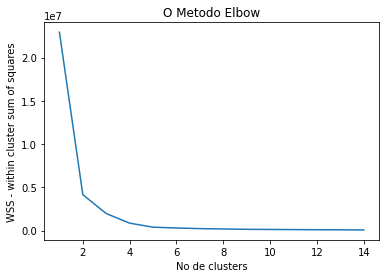

In [9]:
plt.figure(1)
plt.plot(range(1, 15), inertias)
plt.title('O Metodo Elbow')
plt.xlabel('No de clusters')
plt.ylabel('WSS - within cluster sum of squares')
plt.show()

Vamos tentar utilizar 3 clusters para esse caso.

#Trabalhando com K-Means


##Preparação

In [10]:
kmeans3 = KMeans(n_clusters=3) #quantidade de clusters para simular

##Aplicação

In [11]:
kmeans3.fit(df_tempoMedio_means) #aplicação do kmeans no dataset

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
df_tempoMedio_means["cluster"] = kmeans3.labels_ #inclusão dos clusters determinados no dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##Plotagem da clusterização - Kmeans

Text(0.5, 1.0, 'K-Means - TempoMedio')

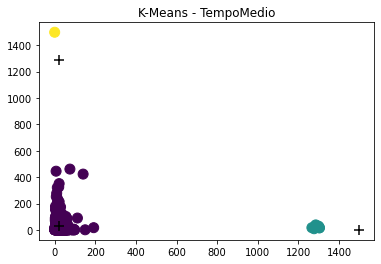

In [13]:
plt.scatter(df_tempoMedio_means.TempoMedio,df_tempoMedio_means.Quantidade, c=df_tempoMedio_means.cluster, s=100)
plt.scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1],s=100,c='black',label="Centroids",marker='+')
plt.title("K-Means - TempoMedio")


In [14]:
df_tempoMedio_means[df_tempoMedio_means["cluster"]==1]

,Quantidade,TempoMedio,cluster
95,38,1285,1
101,30,1283,1
105,28,1299,1
108,24,1293,1
110,22,1295,1
120,20,1297,1
124,19,1297,1
125,19,1291,1
126,17,1266,1
129,16,1303,1


O Kmeans se mostrou coerente na clusterização.

#Tralhando com DBSCAN

##Preparação

In [15]:
df_tempoMedio_dbscan = df_tempoMedio[['Quantidade','TempoMedio']]
df_tempoMedio_dbscan

,Quantidade,TempoMedio
0,1498,0
1,461,75
2,445,7
3,423,140
4,351,22
...,...,...
597,1,1
598,1,16
599,1,12
600,1,46


##Normalização dos dados

In [16]:
SS = StandardScaler().fit_transform(df_tempoMedio_dbscan)

##Aplicação DBSCAN

In [17]:
db = DBSCAN(eps=1.5,min_samples=5).fit(SS)
print(db.labels_)

[-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  1  0  0  0  1  0  0  1  0  1  0  0  0  0  0  0  0  0  0
  1  0  0  0  1  1  1  0  0  1  1  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

##Plotagem da clusterização - DBSCAN

In [18]:
df_tempoMedio_dbscan['cluster'] = db.labels_ #inclusão do número do cluster no dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Quantidades')

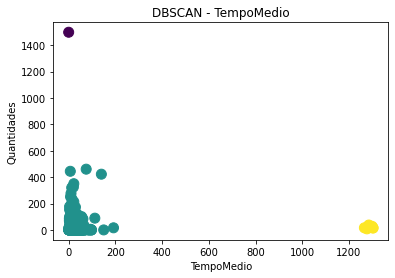

In [19]:
plt.scatter(df_tempoMedio_dbscan.TempoMedio,df_tempoMedio_dbscan.Quantidade, c=df_tempoMedio_dbscan.cluster, s=100)
plt.title("DBSCAN - TempoMedio")
plt.xlabel('TempoMedio')
plt.ylabel('Quantidades')

O resultado do DBSCAN ficou um pouco confuso e difícil de interpretar.

#Respostas



1.   O que representam os clusters gerados?
   
    * Cluster 0 - Quantidade de interações e tempo médio baixo, refere-se a interações normais de usuários
    * Cluster 1 - Baixa quantidade de interações e tempo médio alto, pode estar relacionado a ociosidade sistêmica (usuário utiliza a ferramenta e a resposta é lenta) ou a falta de encerramento de sessão (usuário esqueceu a ferramenta aberta)
    * Cluster 2 - Grande quantidade de interações com baixo tempo médio, refere-se a equipe Dados Pesquisa, que pode ser uma consulta sistêmica aos dados via API, por exemplo.
2.   Qual é a melhor quantidade de Clusters?
    * 3

3. Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nessa clusterização?
    * K-means. O DBSCAN exige ajuste fino dos parâmetros.